# Data Science Training
## Workshop - Market Basket Analysis

### Introduction 

In this workshop, Frequent Itemsets via Apriori Algorithm Apriori function will be explored in order to extract frequent itemsets for association rule mining We have a dataset of a mall with 7500 transactions of different customers buying different items from the store. We have to find correlations between the different items in the store, so that we can know if a customer is buying apple, banana and mango. what is the next item, the customer would be interested in buying from the store.

Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.


#### Overall goal: 
You are a data scienctist and would like you to perform a Market Basket Analysis. Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.
Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

#### Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

#### Section 02: Data Analysis
* Is it a regression/ classification problem?
* Is it a supervised/ unsupervised problem?
* Which model parameters should we take care of?

### Required Libraries

In [1]:
# !pip3 install squarify
# !pip3 install mlxtend
# !pip3 install wordcloud

In [3]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Section 01: Exploratory Data Analysis

Before we start the analysis process, we first need to load dataset. The dataset can be found in the data founder and is called **Market_Basket_Optimisation.csv** which contains information about Customers buying different grocery items at a Mall.

In [57]:
# reading the dataset
# your code here
data = pd.read_csv('[filepath]', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

Let's check the first 5 rows of our data

In [6]:
# checking the head of the data
# your code here

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the last 5 rows of our data

In [7]:
# checking the tail of the data
# your code here

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's randomly view 10 random rows of our data

In [58]:
# randomly select 10 samples
# your code here

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6190,turkey,frozen vegetables,ground beef,meatballs,energy bar,whole wheat rice,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,burgers,shrimp,spaghetti,avocado,milk,olive oil,french wine,chutney,honey,gums,cereals,chocolate,melons,hand protein bar,zucchini,NaN,NaN,NaN,NaN,NaN
1062,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,meatballs,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6656,champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5722,shrimp,barbecue sauce,french fries,cookies,hot dogs,pancakes,light mayo,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7011,frozen vegetables,brownies,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,shrimp,pasta,chicken,chocolate bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3057,butter,shallot,energy drink,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,shrimp,parmesan cheese,olive oil,light cream,cooking oil,chicken,chili,extra dark chocolate,cottage cheese,brownies,pancakes,energy drink,salt,salad,magazines,NaN,NaN,NaN,NaN,NaN


Let's describe our data.

In [9]:
# let's describe the dataset
# your code here

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


Let's visualize them using **wordcloud**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

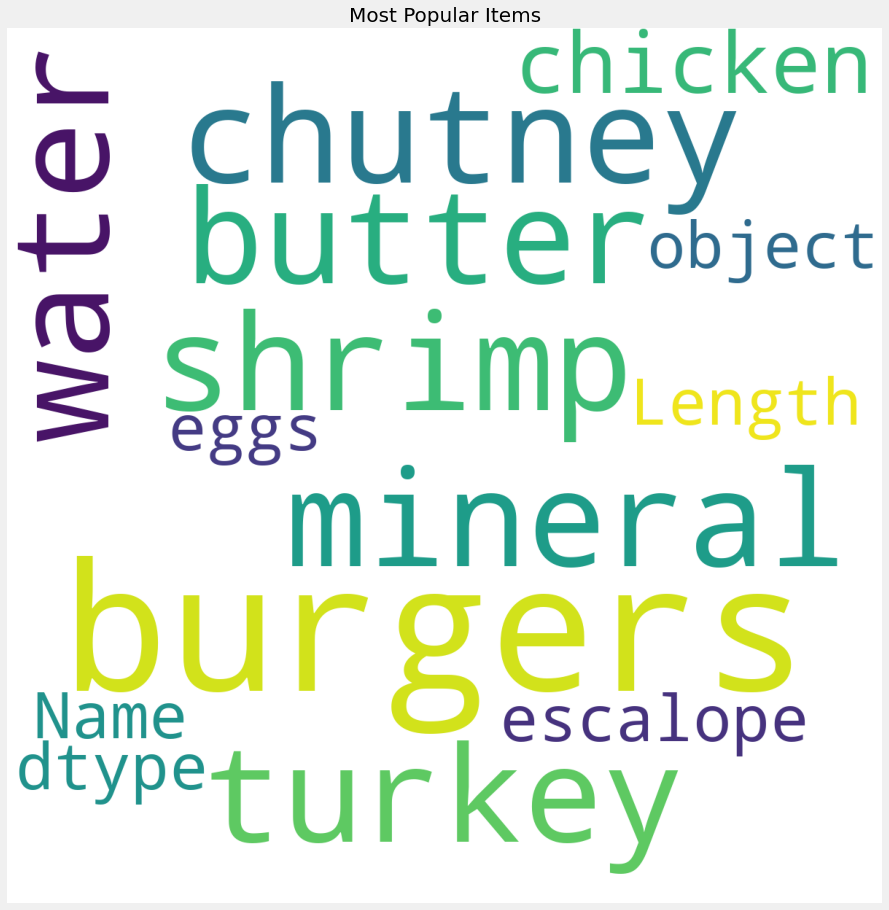

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

Let's visualize them using a simple bar plot

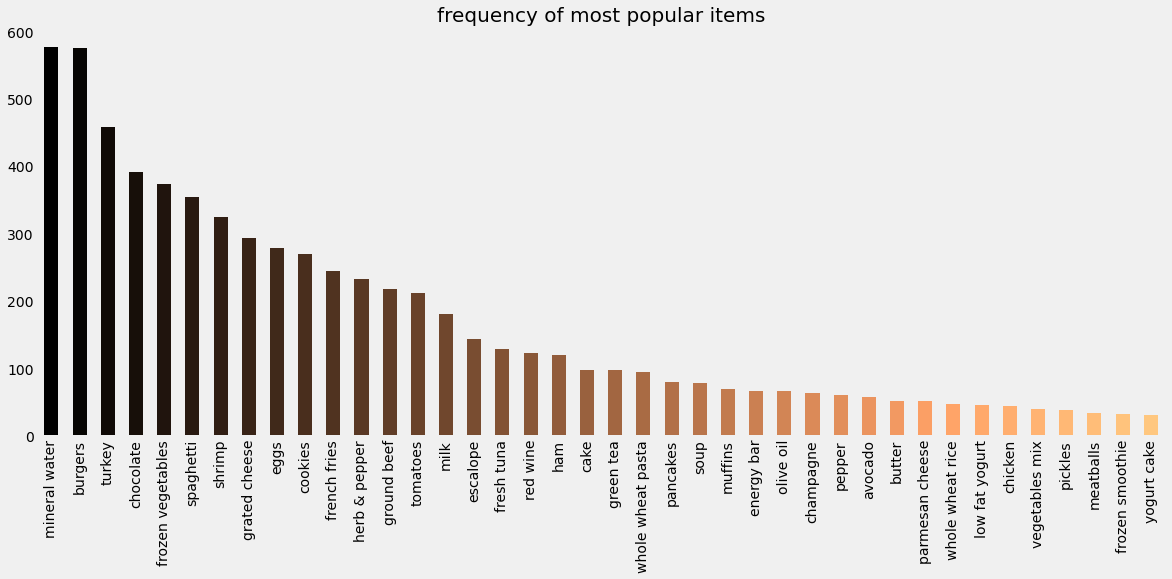

In [61]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Or even to visualize them using a tree map

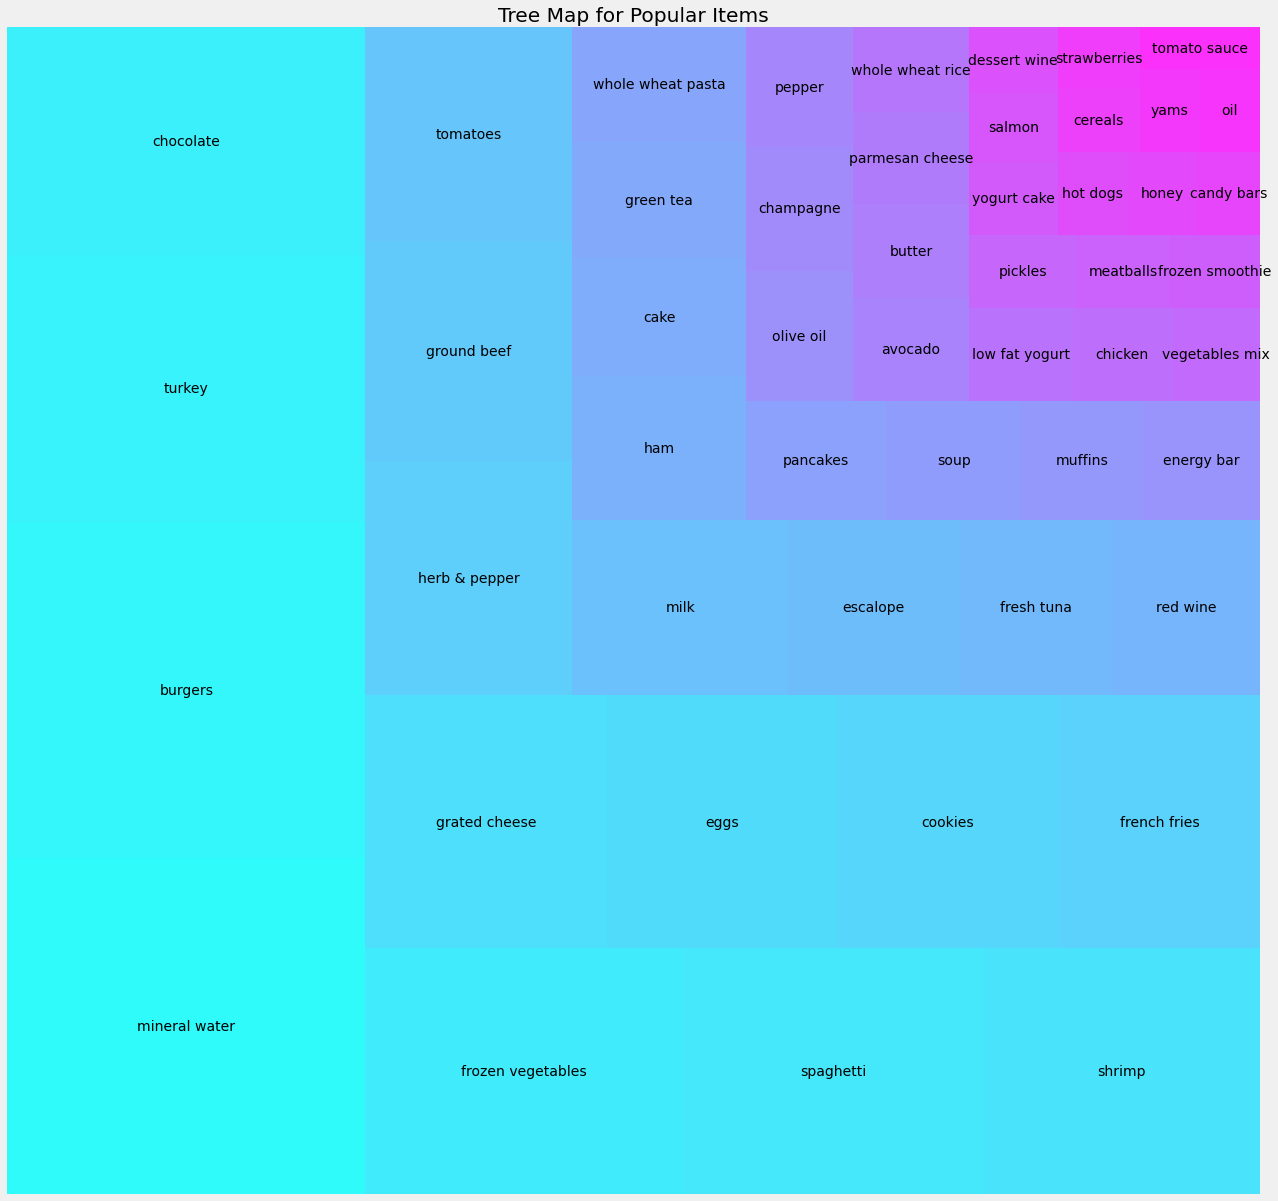

In [14]:
# plotting a tree map

y = data[0].value_counts().head(50).to_frame()
y.index

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

Let's visualize the top 15 first choices of our customers using library called networkx

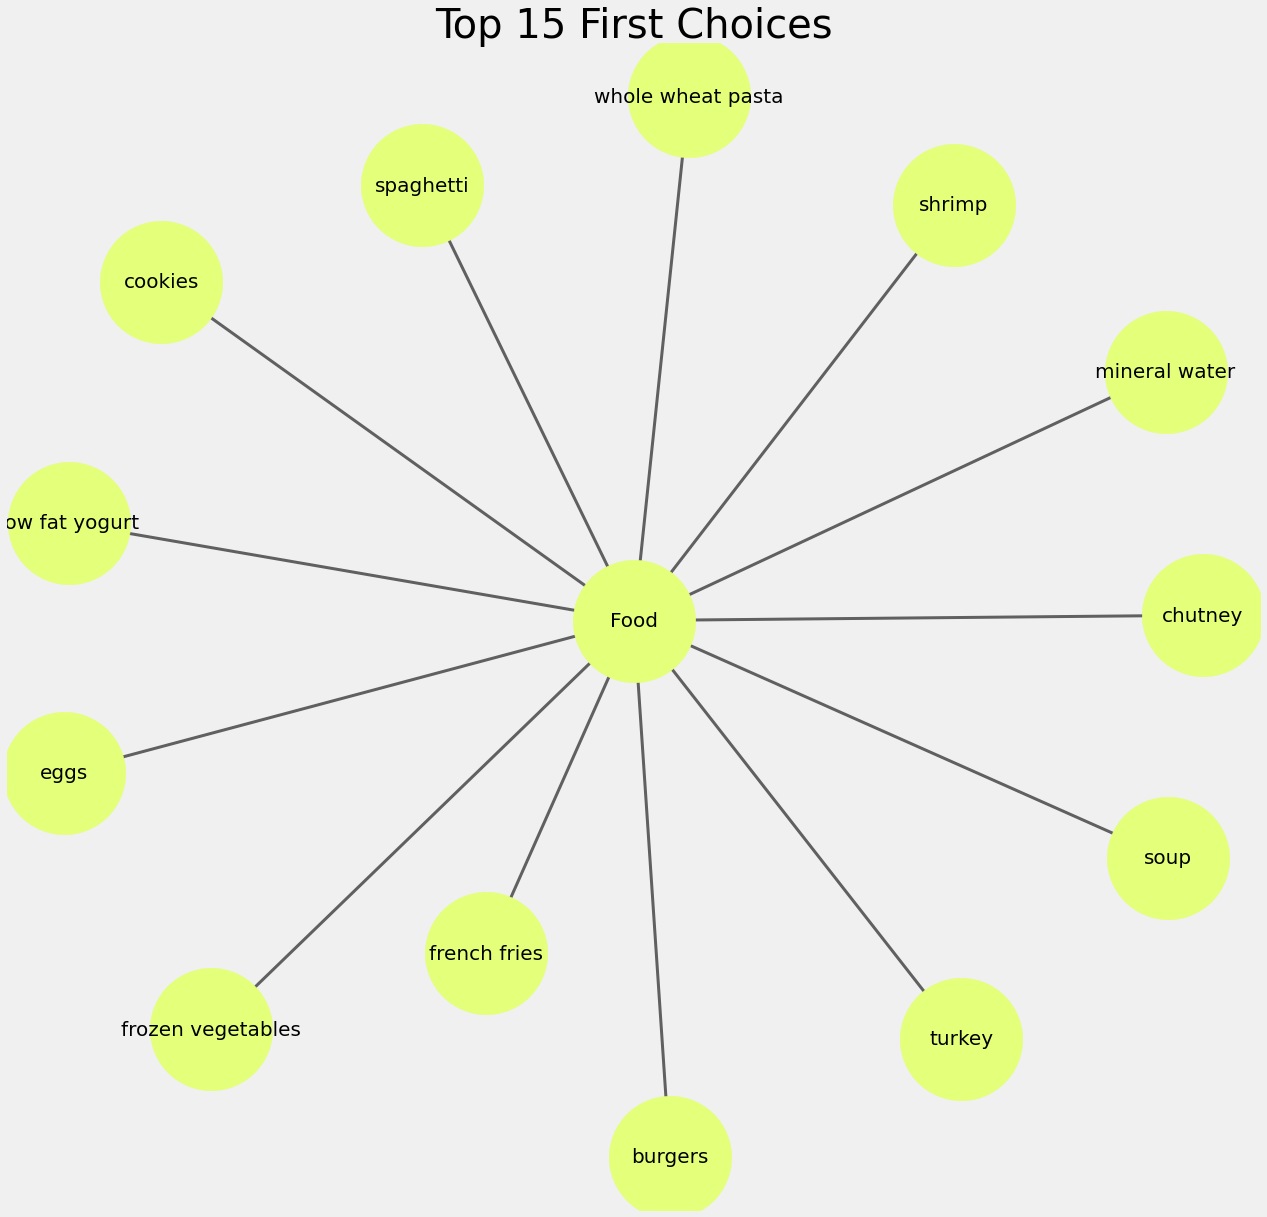

In [63]:
import warnings
warnings.filterwarnings('ignore')

data['food'] = 'Food'
food = data.truncate(before = -1, after = 15) # to take only top 15 items

import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

Let's visualize the top 15 second choices of our customers using library called networkx

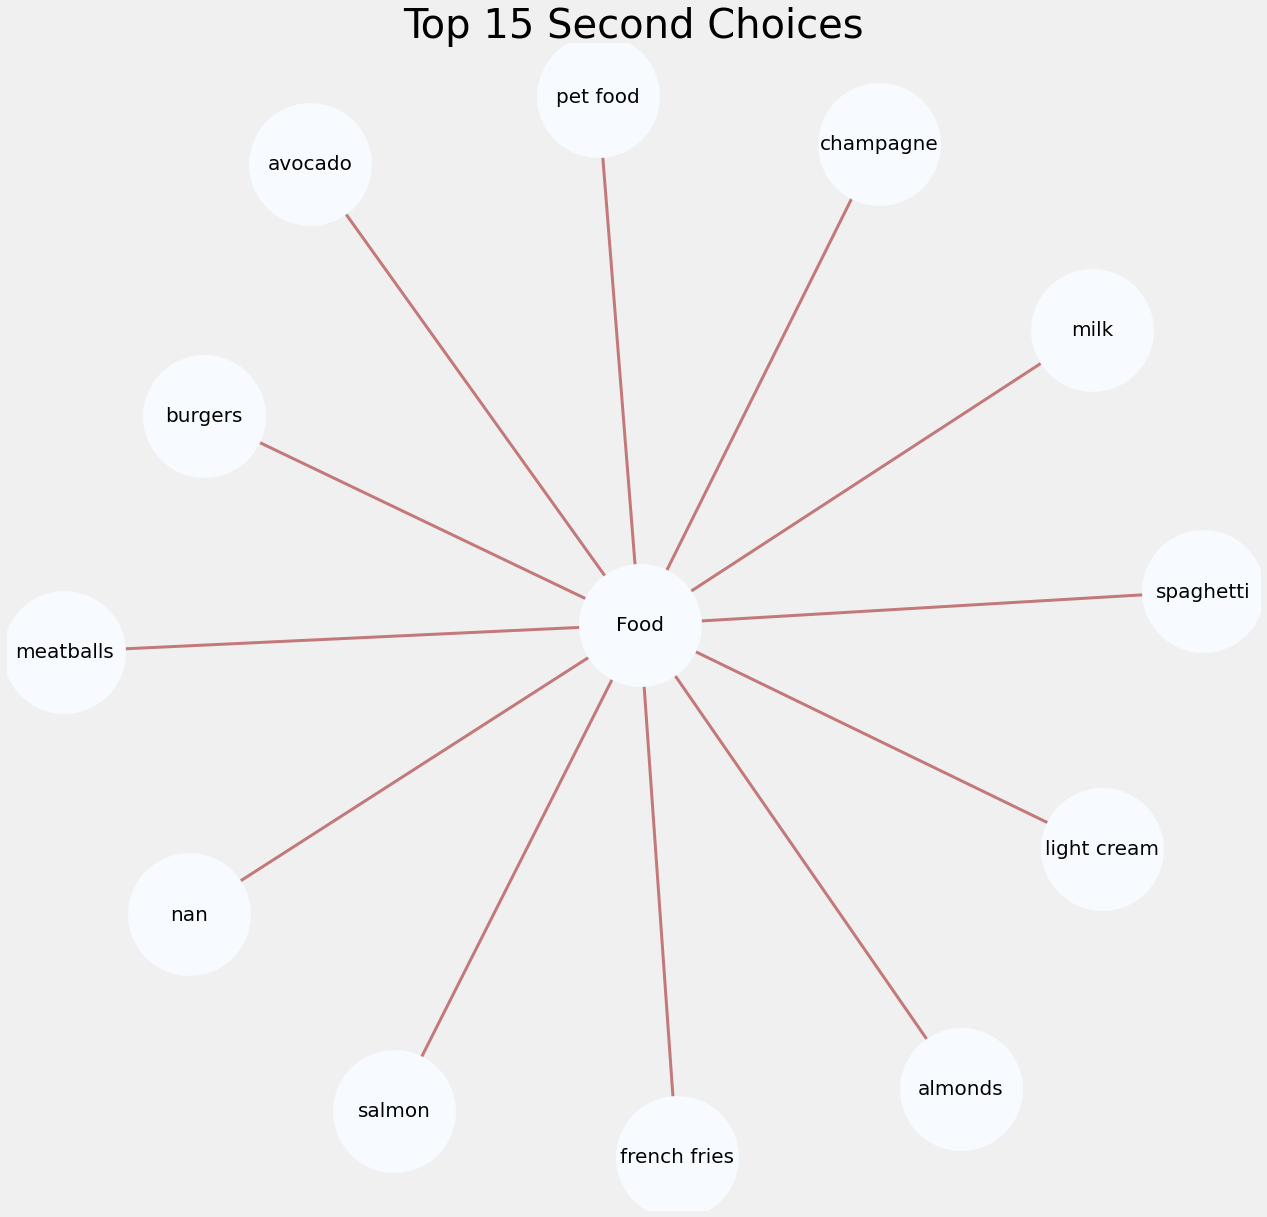

In [64]:
import warnings
warnings.filterwarnings('ignore')

data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

# your code here

Let's visualize the top 15 third choices of our customers using library called networkx

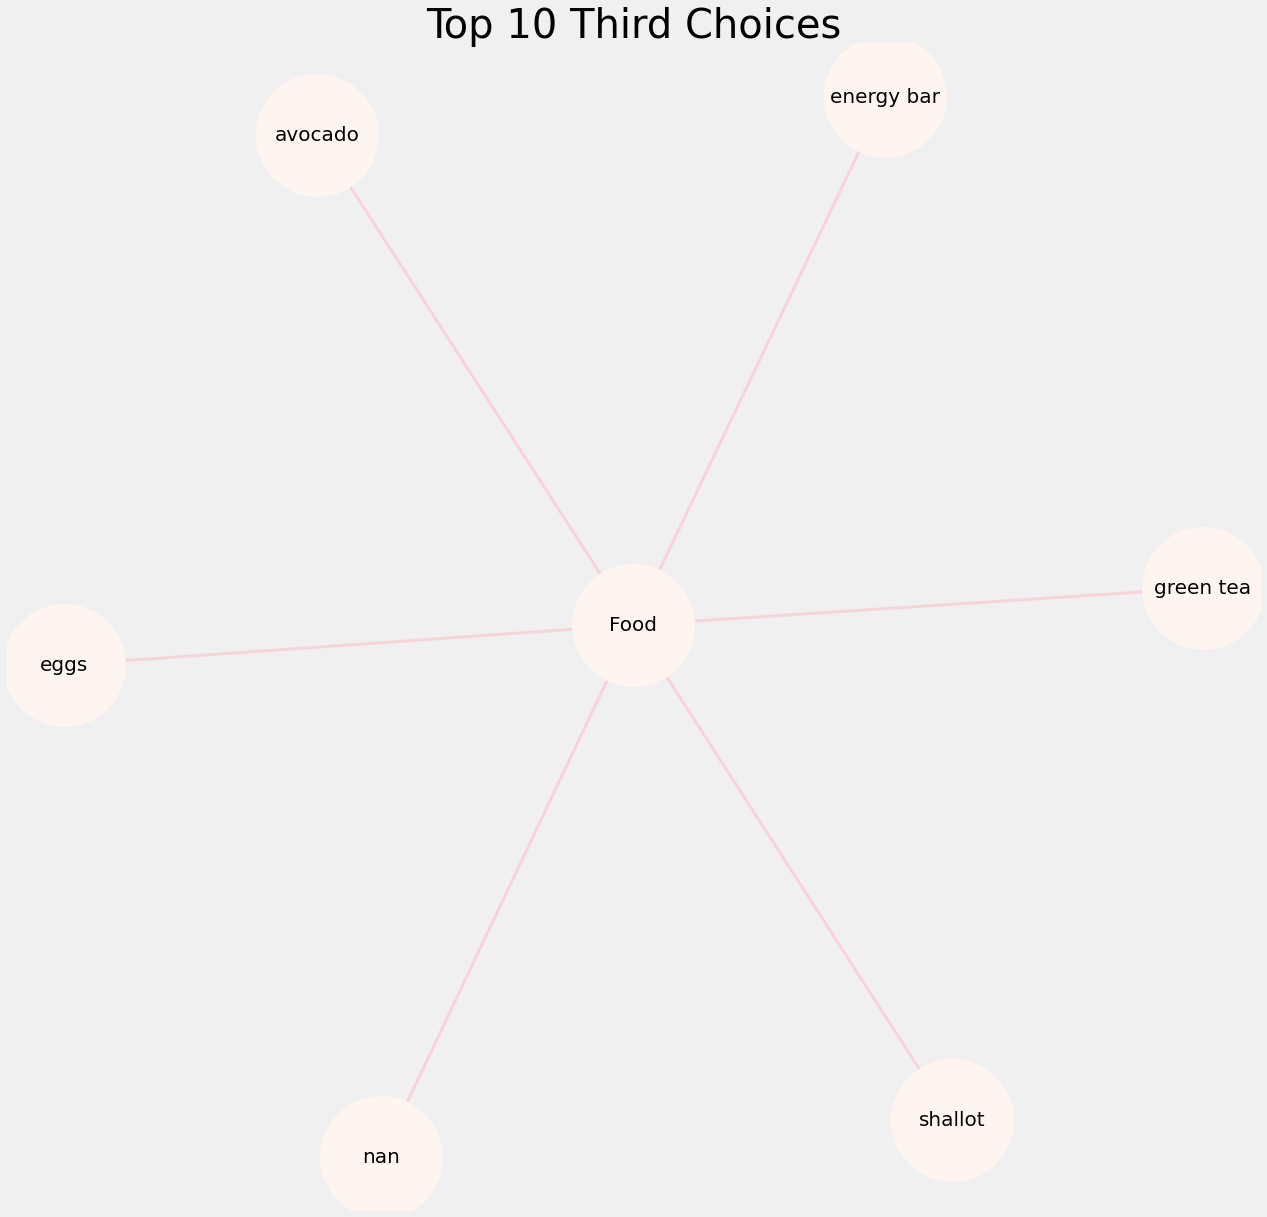

In [66]:
import warnings
warnings.filterwarnings('ignore')

data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

#### Section 02: Data Analysis

Before we do the analysis, preprocessing the data is an essential step.

Let's see the columns again of our data.

In [87]:
data.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
       'secondchoice',         'food',  'thirdchoice'],
      dtype='object')

You see the last three columns are not at our interest, therefore we will eliminate the last three columns and convert to string.

In [88]:
# making each customers shopping items an identical list
trans = []
for i in range(0, data.shape[0]):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


Let's visualize the first 5 rows

In [89]:
# your code here

array([['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
        'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
        'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
        'mineral water', 'salmon', 'antioxydant juice',
        'frozen smoothie', 'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan'],
       ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan'],
       ['mineral water', 'milk', 'energy bar', 'whole wheat rice',
        'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan',

Perform preprocessing by using TransactionEncoder imported from a library called mlxtend.preprocessing.

See explanation: http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [90]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# your code here



# Convert back to dataframe
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [91]:
print(data)

       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   
7500       False    False              False      False    False        False   

      bacon  barbecue sauce

To get correlations of 121 items would be relatively messy so let's reduce the items from 121 to 50

In [40]:
# let's check the columns, and it seems to be correct
# your code here

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

Let's check the head

In [93]:
# getting the head of the data
# your code here

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Applying Apriori 
How does Apriori Algorithm Work ?
A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too
Step 1: Create a frequency table of all the items that occur in all the transactions.

Step 2: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

Step 3: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

Step 4: We will now count the occurrences of each pair in all the transactions.

Step 5: Again only those itemsets are significant which cross the support threshold

Step 6: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

See explanation: https://intellipaat.com/blog/data-science-apriori-algorithm/

In [94]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(mineral water, ground beef, eggs)"
205,0.013065,"(mineral water, eggs, milk)"
206,0.011065,"(mineral water, ground beef, milk)"
207,0.010532,"(spaghetti, eggs, chocolate)"


The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

In [95]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [96]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(mineral water, chocolate)",2
25,0.059725,"(mineral water, spaghetti)",2
26,0.050927,"(mineral water, eggs)",2


In [97]:
# getting th item sets with length = 1 and support more han 10%
# your code here

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


## Association Mining

Association rule mining is the data mining process of finding the rules that may govern associations and causal objects between sets of items. So in a given transaction with multiple items, it tries to find the rules that govern how or why such items are often bought together.

Now let's see the association between chosen items

In [49]:
# egg and mineral water
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(mineral water, eggs)",2


In [50]:
# mineral water
# your code here

,support,itemsets,length
0,0.238368,(mineral water),1


In [51]:
# milk
# your code here

,support,itemsets,length
13,0.129583,(milk),1


In [52]:
# chicken
# your code here

,support,itemsets,length
22,0.059992,(chicken),1


In [53]:
# frozen vegetables
# your code here

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [98]:
# chocolate
# your code here

,support,itemsets,length
3,0.163845,(chocolate),1
